# Capstone Project Batch: B Group: 3                                                                      

### Members: Tanisha Jain , Priya Bhardwaj, Aman Bhardwaj, Satyam Sharma and Suneetha Vemula 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


In [71]:
carSalesData = pd.read_csv('Car_sales_details_p3.csv')
salesStatus = pd.read_csv('sales_Status_p3.csv')
stateRegionMapping = pd.read_csv('State_region_mapping_p3.csv')


In [72]:
carSalesData.head(3)


,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5


In [73]:
salesStatus.head(3)

,Sales_ID,sold
0,1,Y
1,2,Y
2,3,Y


In [74]:
stateRegionMapping.head(3)

,Region,State or Province
0,Central,Illinois
1,Central,Indiana
2,Central,Iowa


In [75]:
carSalesData.shape 

(7906, 15)

In [76]:
salesStatus.head(3)

,Sales_ID,sold
0,1,Y
1,2,Y
2,3,Y


In [77]:
salesStatus.shape

(7906, 2)

In [78]:
stateRegionMapping.head(3)

,Region,State or Province
0,Central,Illinois
1,Central,Indiana
2,Central,Iowa


In [79]:
stateRegionMapping.shape

(49, 2)

# Merging the three dataframes and saving it into a new csv file

Merging datasets CarSalesData and SalesStatus on attribute salesID and then mapping the regions using the stateRegionMapping data. After merging, the shape of the MergedCarSalesData will be (7906, 18). The brand attribute has been engineered into the merged dataset by extracting the first words from the names of the car.

In [80]:
mergedCarSalesData = pd.merge(carSalesData,salesStatus,how='inner',on='Sales_ID')
mergedCarSalesData.head(3)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Y


In [81]:
keys = list(stateRegionMapping['State or Province'])
values = list(stateRegionMapping['Region'])
state_dict = {keys[i]: values[i] for i in range(len(keys))}
state_dict

{'Illinois': 'Central',
 'Indiana': 'Central',
 'Iowa': 'Central',
 'Kansas': 'Central',
 'Michigan': 'Central',
 'Minnesota': 'Central',
 'Missouri': 'Central',
 'Nebraska': 'Central',
 'North Dakota': 'Central',
 'Oklahoma': 'Central',
 'South Dakota': 'Central',
 'Texas': 'Central',
 'Wisconsin': 'Central',
 'Connecticut': 'East',
 'Delaware': 'East',
 'District of Columbia': 'East',
 'Maine': 'East',
 'Maryland': 'East',
 'Massachusetts': 'East',
 'New Hampshire': 'East',
 'New Jersey': 'East',
 'New York': 'East',
 'Ohio': 'East',
 'Pennsylvania': 'East',
 'Rhode Island': 'East',
 'Vermont': 'East',
 'West Virginia': 'East',
 'Alabama': 'South',
 'Arkansas': 'South',
 'Florida': 'South',
 'Georgia': 'South',
 'Kentucky': 'South',
 'Louisiana': 'South',
 'Mississippi': 'South',
 'North Carolina': 'South',
 'South Carolina': 'South',
 'Tennessee': 'South',
 'Virginia': 'South',
 'Arizona': 'West',
 'California': 'West',
 'Colorado': 'West',
 'Idaho': 'West',
 'Montana': 'West',
 'Ne

In [82]:
mergedCarSalesData['region'] = mergedCarSalesData['State or Province'].map(state_dict)

In [83]:
mergedCarSalesData.head(3)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,region
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y,East
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y,East
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Y,Central


In [84]:
brand=[]
for i in range(mergedCarSalesData.shape[0]):
    brand.append(mergedCarSalesData['name'][i].split()[0])

In [142]:
brand[:5]

['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Maruti']

In [86]:
mergedCarSalesData['brand']=brand

In [87]:
mergedCarSalesData.head(2)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,region,brand
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y,East,Maruti
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y,East,Skoda


In [88]:
mergedCarSalesData.shape

(7906, 18)

In [89]:
mergedCarSalesData.to_csv('mergedCarSales.csv')

In [90]:
mergedCarSalesData['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [91]:
for i in range(len(mergedCarSalesData)):
    mergedCarSalesData['mileage'][i] = mergedCarSalesData['mileage'][i].split()[0]
    mergedCarSalesData['engine'][i] = mergedCarSalesData['engine'][i].split()[0]
    mergedCarSalesData['max_power'][i] = mergedCarSalesData['max_power'][i].split()[0]


<ipython-input-91-8987e95fb8c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedCarSalesData['mileage'][i] = mergedCarSalesData['mileage'][i].split()[0]
<ipython-input-91-8987e95fb8c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedCarSalesData['engine'][i] = mergedCarSalesData['engine'][i].split()[0]
<ipython-input-91-8987e95fb8c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedCarSalesData['max_power'][i] = mer

In [92]:
mergedCarSalesData.engine = mergedCarSalesData.engine.astype('int64')
mergedCarSalesData.max_power = mergedCarSalesData.max_power.astype('float')
mergedCarSalesData.mileage = mergedCarSalesData.mileage.astype('float')

#### Assigning dummy values to strings

In [93]:
province_dict = {'District of Columbia': 1, 'New York' :2 , 'Illinois': 3, 'California' : 4,'Texas':5, 'Massachusetts':6, 
              'Washington':7, 'Georgia':8,'North Carolina':9, 'Florida':10, 'Pennsylvania':11, 'Michigan':12, 'Iowa':13,
              'Oregon':14, 'New Mexico':15, 'Maryland':16, 'Montana':17, 'Arkansas':18,'Arizona':19, 'Maine':20, 
              'Vermont':21, 'New Jersey':22, 'Connecticut':23,'Oklahoma':24, 'Tennessee':25, 'Alabama':26, 'Wisconsin':27,
              'South Carolina':28,'New Hampshire':29, 'Idaho':30, 'Minnesota':31, 'Ohio':32, 'Kansas':33, 'Utah':34,
              'Virginia':35, 'Nebraska':36, 'West Virginia':37, 'Colorado':38, 'Indiana':39,'Kentucky':40, 'Missouri':41, 
              'North Dakota':42, 'Rhode Island':43,'Louisiana':44, 'Wyoming':45, 'Nevada':46, 'Mississippi':47, 
              'Delaware':48,'South Dakota':49}

region_dict = {'East':1, 'Central':2, 'West':3, 'South':4}

transmission_dict = {'Manual' : 1 , 'Automatic' : 2}

seller_type_dict = {'Individual' : 1, 'Dealer' : 2, 'Trustmark Dealer' : 3}

owner_dict = {'First Owner':1,'Second Owner':2, 'Third Owner':3,'Fourth and Above Owner':4, 'Test Drive Car':5}

fuel_dict = {'Diesel':1, 'Petrol':2, 'LPG':3, 'CNG':4}

In [94]:
dummy_data = pd.get_dummies(mergedCarSalesData, columns=['sold'], drop_first=True)

In [95]:
dummy_data['State or Province'] = dummy_data['State or Province'].map(province_dict)
dummy_data['region'] = dummy_data['region'].map(region_dict)
dummy_data['transmission'] = dummy_data['transmission'].map(transmission_dict)
dummy_data['seller_type'] = dummy_data['seller_type'].map(seller_type_dict)
dummy_data['fuel'] = dummy_data['fuel'].map(fuel_dict)
dummy_data['owner'] = dummy_data['owner'].map(owner_dict)
dummy_data.head(3)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,region,brand,sold_Y
0,1,Maruti Swift Dzire VDI,2014,450000,145500,1,Washington,1,1,1,1.0,23.40,1248,74.00,5,1,Maruti,1
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,2,New York City,1,1,1,2.0,21.14,1498,103.52,5,1,Skoda,1
2,3,Honda City 2017-2020 EXi,2006,158000,140000,3,Chicago,2,1,1,3.0,17.70,1497,78.00,5,2,Honda,1


In [96]:
dummy_data.dtypes


Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
State or Province      int64
City                  object
fuel                   int64
seller_type            int64
transmission           int64
owner                float64
mileage              float64
engine                 int64
max_power            float64
seats                  int64
region                 int64
brand                 object
sold_Y                 uint8
dtype: object

In [97]:
sold = mergedCarSalesData[mergedCarSalesData['sold']=='Y']


In [98]:
sold.head(2)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,region,brand
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Y,East,Maruti
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Y,East,Skoda


In [99]:
sold.shape

(2000, 18)

# Statistical Analysis using Python

### a.	Descriptive statistics for both numerical and categorical and draw few insights from them.

In [100]:
mergedCarSalesData.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'sold', 'region',
       'brand'],
      dtype='object')

In [101]:
mergedCarSalesData.year.value_counts()

2017    1010
2016     856
2018     806
2015     775
2013     668
2012     621
2014     620
2019     583
2011     570
2010     375
2009     231
2008     201
2007     173
2006     102
2005      76
2020      74
2004      51
2003      37
2002      19
2000      15
1999      14
1997       9
1998       9
2001       6
1996       2
1994       2
1995       1
Name: year, dtype: int64

In [102]:
mergedCarSalesData.km_driven.value_counts()

120000    510
70000     441
80000     430
60000     413
50000     379
         ... 
72113       1
36521       1
16830       1
50856       1
426000      1
Name: km_driven, Length: 898, dtype: int64

In [103]:
mergedCarSalesData['State or Province'].value_counts()

California              901
Texas                   499
New York                491
Illinois                489
Florida                 425
Ohio                    321
Michigan                305
Washington              295
Pennsylvania            235
North Carolina          222
Indiana                 213
Massachusetts           191
Georgia                 187
Minnesota               169
Virginia                167
Colorado                154
New Jersey              154
Maryland                144
Missouri                141
Tennessee               135
Utah                    133
Oregon                  129
Iowa                    123
Wisconsin               117
Arizona                 115
Kansas                  112
Maine                   110
Arkansas                107
Alabama                 106
Oklahoma                 95
Idaho                    89
South Carolina           81
New Mexico               71
District of Columbia     68
Louisiana                66
Mississippi         

In [104]:
mergedCarSalesData.City.value_counts()

New York City    196
Los Angeles      191
Seattle           92
Chicago           88
Boston            75
                ... 
Beverly            1
Manitowoc          1
Shrewsbury         1
Talladega          1
Webster            1
Name: City, Length: 1310, dtype: int64

In [105]:
mergedCarSalesData.fuel.value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [106]:
mergedCarSalesData.seller_type.value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [107]:
mergedCarSalesData.transmission.value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [108]:
mergedCarSalesData.owner.value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [109]:
mergedCarSalesData.mileage.value_counts()

18.90    225
19.70    173
18.60    164
21.10    158
17.00    133
        ... 
16.73      1
17.97      1
32.52      1
13.38      1
12.50      1
Name: mileage, Length: 381, dtype: int64

In [110]:
mergedCarSalesData.engine.value_counts()

1248    1017
1197     832
998      453
796      443
2179     389
        ... 
2446       1
3498       1
2650       1
1339       1
2197       1
Name: engine, Length: 121, dtype: int64

In [111]:
mergedCarSalesData.max_power.value_counts()

74.00     377
88.50     222
81.80     220
67.00     165
46.30     162
         ... 
161.00      1
265.00      1
175.00      1
157.75      1
155.00      1
Name: max_power, Length: 318, dtype: int64

In [112]:
mergedCarSalesData.sold.value_counts()

N    5906
Y    2000
Name: sold, dtype: int64

In [113]:
mergedCarSalesData.seats.value_counts()

5     6254
7     1120
8      235
4      133
9       80
6       62
10      19
2        2
14       1
Name: seats, dtype: int64

From the above code snippets, we can statistically analyse and divide the columns into discrete/categorical and numerical/continuous attributes:
DISCRETE: year, state or province, owner, seller type, sold, seats, transmission, fuel.
CONTINUOUS: km driven, selling price, mileage, engine, max power 
 


In [114]:
mergedCarSalesData.km_driven.describe()

count    7.906000e+03
mean     6.918866e+04
std      5.679230e+04
min      1.000000e+00
25%      3.500000e+04
50%      6.000000e+04
75%      9.542500e+04
max      2.360457e+06
Name: km_driven, dtype: float64

In [115]:
print('Kms Driven:')
print("Mode:", mergedCarSalesData.km_driven.mode()[0] , "\nSkewness:", mergedCarSalesData.km_driven.skew() , "\nKurtosis", mergedCarSalesData.km_driven.kurtosis() ) 

Kms Driven:
Mode: 120000 
Skewness: 11.342852951264694 
Kurtosis 388.67861197718906


In [116]:
print('Kms Driven:')
Q1 = np.percentile(mergedCarSalesData.km_driven,25)
Q3 = np.percentile(mergedCarSalesData.km_driven,75)

print("Q1:", Q1)
print("Q3:", Q3)

IQR = Q3 - Q1
print("IQR:", IQR)

x = Q3 + 1.5*IQR #upper_bound
y = Q1 - 1.5*IQR #lower_bound

print("Q3 + 1.5 IQR : ",x)
print("Q1 - 1.5 IQR : ",y)
print('No of outliers found using IQR Method:',mergedCarSalesData[(mergedCarSalesData['km_driven']>x) | (mergedCarSalesData['km_driven']<y)].shape[0])


Kms Driven:
Q1: 35000.0
Q3: 95425.0
IQR: 60425.0
Q3 + 1.5 IQR :  186062.5
Q1 - 1.5 IQR :  -55637.5
No of outliers found using IQR Method: 194


C:\Users\tanishajain8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven'>

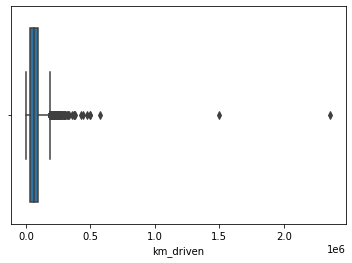

In [117]:
sns.boxplot(mergedCarSalesData.km_driven) 

In [118]:
mergedCarSalesData.mileage.describe()

count    7906.000000
mean       19.419861
std         4.036263
min         0.000000
25%        16.780000
50%        19.300000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64

In [119]:
print('Mileage:')
print("Mode:",mergedCarSalesData.mileage.mode()[0],"\nSkewness: ",mergedCarSalesData.mileage.skew(),"\nKurtosis: ",mergedCarSalesData.mileage.kurtosis()) 

Mileage:
Mode: 18.9 
Skewness:  -0.14239051994522683 
Kurtosis:  0.5710336151887505


In [120]:
mu=np.mean(mergedCarSalesData['mileage'])
sigma=np.std(mergedCarSalesData['mileage'] )
upper_bound=mu + 3*sigma
lower_bound= mu - 3*sigma
print('Mileage:')
print('Mean:',mu,'\nStandard Deviation:',sigma,'\nUpper and Lower Bound',upper_bound,'&',lower_bound)
print('No Of Outliers found using Z Method:',mergedCarSalesData[(mergedCarSalesData['mileage'] >upper_bound) | (mergedCarSalesData['mileage'] <lower_bound)].shape[0])
 



Mileage:
Mean: 19.419860865165674 
Standard Deviation: 4.036007926863023 
Upper and Lower Bound 31.527884645754746 & 7.311837084576604
No Of Outliers found using Z Method: 24


In [121]:
mergedCarSalesData.max_power.describe()

count    7906.000000
mean       91.587374
std        35.747216
min        32.800000
25%        68.050000
50%        82.000000
75%       102.000000
max       400.000000
Name: max_power, dtype: float64

In [122]:
mode=mergedCarSalesData.max_power.mode()[0]
sk=mergedCarSalesData.max_power.skew()
kurt=mergedCarSalesData.max_power.kurtosis()
print('Max Power:')
print('Mode: %s \nSkewness: %s \nKurtosis: %s '% (mode,sk,kurt))

Max Power:
Mode: 74.0 
Skewness: 1.639673159282524 
Kurtosis: 3.8016160968044534 


In [123]:
mu = np.mean(mergedCarSalesData.max_power)
sigma = np.std(mergedCarSalesData.max_power)
upper_bound=mu + 3*sigma
lower_bound= mu - 3*sigma
print('Max Power:')
print('Mean:',mu,'\nStandard Deviation:',sigma,'\nUpper and Lower Bound',upper_bound,'&',lower_bound)
#print()
print('No Of Outliers found using Z Method:',mergedCarSalesData[(mergedCarSalesData.max_power>upper_bound) | (mergedCarSalesData.max_power<lower_bound)].shape[0])


Max Power:
Mean: 91.58737351378655 
Standard Deviation: 35.744955247996224 
Upper and Lower Bound 198.8222392577752 & -15.647492230202133
No Of Outliers found using Z Method: 90


In [124]:
mode=mergedCarSalesData.engine.mode()[0]
sk=mergedCarSalesData.engine.skew()
kurt=mergedCarSalesData.engine.kurtosis()
print('Engine:')
print('Mode: %s \nSkewness: %s \nKurtosis: %s '% (mode,sk,kurt))

Engine:
Mode: 1248 
Skewness: 1.1353585465845375 
Kurtosis: 0.7325340409494281 


In [125]:
print('Engine:')
q1 = np.percentile(mergedCarSalesData.engine,25)
q3 = np.percentile(mergedCarSalesData.engine,75)
print("Q1:", q1)
print("Q3:", q3)
IQR = q3 - q1
print("IQR:", IQR)
x = q3 + 1.5*IQR #upper_bound
y = q1 - 1.5*IQR #lower_bound
print("Q3 + 1.5 IQR : ",x)
print("Q1 - 1.5 IQR : ",y)
print('No Of Outliers using IQR Method:',mergedCarSalesData[(mergedCarSalesData['engine']>x) | (mergedCarSalesData['engine']<y)].shape[0])

Engine:
Q1: 1197.0
Q3: 1582.0
IQR: 385.0
Q3 + 1.5 IQR :  2159.5
Q1 - 1.5 IQR :  619.5
No Of Outliers using IQR Method: 1183


C:\Users\tanishajain8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Data Distribution in Engine')

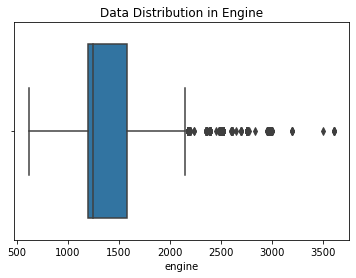

In [139]:
sns.boxplot(mergedCarSalesData.engine)
plt.title('Data Distribution in Engine')

In [127]:
print('Modes of Categorical/Discrete Columns:')
for i in ['year', 'State or Province', 'owner','seller_type', 'sold', 'seats','name','brand']:
    print(i,":",mergedCarSalesData[i].mode()[0])

Modes of Categorical/Discrete Columns:
year : 2017
State or Province : California
owner : First Owner
seller_type : Individual
sold : N
seats : 5
name : Maruti Swift Dzire VDI
brand : Maruti


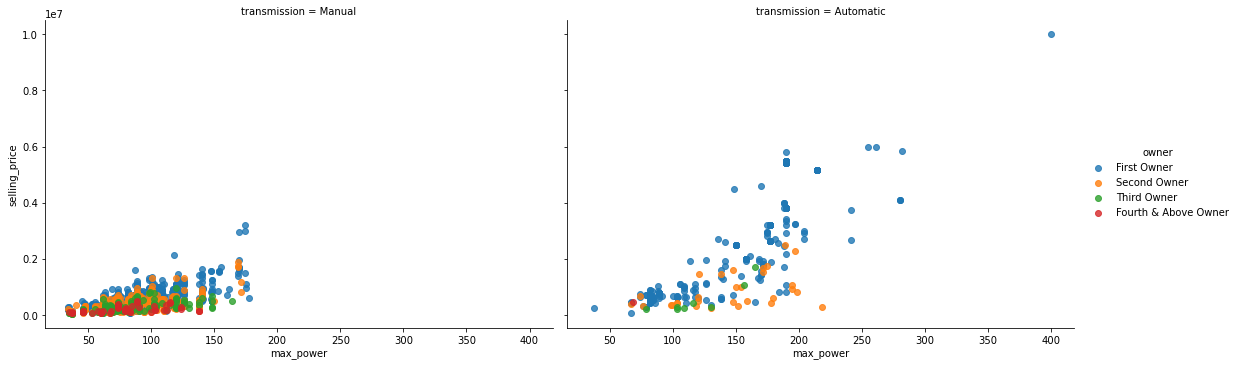

In [128]:
sns.lmplot(x='max_power',y='selling_price',col='transmission',hue='owner',aspect=1.5,fit_reg=False,data=sold)

Text(0.5, 1.0, 'Price distribution of different Brands')

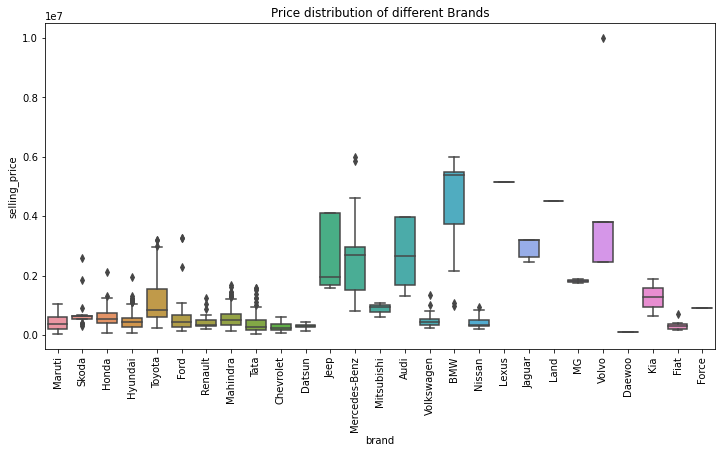

In [129]:
plt.figure(figsize=(12,6))
sns.boxplot(x='brand',y='selling_price',data=sold)
plt.xticks(rotation=90);
plt.title('Price distribution of different Brands')

### b.	Perform relevant hypothesis testing (t, chi-Square, Anova tests) 

In [130]:
sold.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'sold', 'region',
       'brand'],
      dtype='object')

#H0: region and year for already sold cars have no association
#H1: region and year for already sold cars have association

In [131]:
contigency_table=pd.crosstab(sold.region,sold.year)
contigency_table

year,1994,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
region,,,,,,,,,,,,,,,,,,,,,
Central,0,2,2,0,1,6,6,6,8,6,...,55,44,42,37,45,52,69,58,32,5
East,1,1,2,0,1,2,3,9,10,10,...,44,44,55,49,63,67,88,60,48,6
South,0,0,0,1,1,0,2,5,4,3,...,24,27,36,25,37,38,44,27,35,3
West,0,0,1,1,4,2,2,5,1,9,...,32,44,41,33,55,68,55,42,39,5


In [132]:
st.chi2_contingency(contigency_table)

(62.15201007452517,
 0.6115305994550148,
 66,
 array([[ 0.27  ,  0.81  ,  1.35  ,  0.54  ,  1.89  ,  2.7   ,  3.51  ,
          6.75  ,  6.21  ,  7.56  , 11.61  , 19.17  , 25.92  , 41.85  ,
         42.93  , 46.98  , 38.88  , 54.    , 60.75  , 69.12  , 50.49  ,
         41.58  ,  5.13  ],
        [ 0.315 ,  0.945 ,  1.575 ,  0.63  ,  2.205 ,  3.15  ,  4.095 ,
          7.875 ,  7.245 ,  8.82  , 13.545 , 22.365 , 30.24  , 48.825 ,
         50.085 , 54.81  , 45.36  , 63.    , 70.875 , 80.64  , 58.905 ,
         48.51  ,  5.985 ],
        [ 0.1715,  0.5145,  0.8575,  0.343 ,  1.2005,  1.715 ,  2.2295,
          4.2875,  3.9445,  4.802 ,  7.3745, 12.1765, 16.464 , 26.5825,
         27.2685, 29.841 , 24.696 , 34.3   , 38.5875, 43.904 , 32.0705,
         26.411 ,  3.2585],
        [ 0.2435,  0.7305,  1.2175,  0.487 ,  1.7045,  2.435 ,  3.1655,
          6.0875,  5.6005,  6.818 , 10.4705, 17.2885, 23.376 , 37.7425,
         38.7165, 42.369 , 35.064 , 48.7   , 54.7875, 62.336 , 45.5345,
      

##since p-value(not close to 0)---->accept H0
##Yes there is no association between year and region

In [133]:
from statsmodels.stats.proportion import proportions_ztest

In [134]:
len(sold[sold.brand=='Maruti'])

597

In [135]:
len(sold)

2000

In [136]:
597/2000

0.2985

#H0: Maruti accounts for 30% of the cars sold
#h1: Maruti doesn't account for 30% of the cars sold

In [140]:
x=len(sold[sold.brand=='Maruti'])
n=len(sold)
P=0.30

In [141]:

proportions_ztest(x,n,P)

(-0.14659536915817054, 0.8834514090696418)

The p-value is greater than 0.05 so we can accept the Null Hypothesis that Maruti accounts for 30% of the cars sold. Here, the p-value is 0.883.